In [7]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('notebook')
from matplotlib.ticker import StrMethodFormatter

In [9]:
!ls ../analysis/uncertainty/al-binomial/bars-full

bars_coverage_df.csv
bars_single_coverage_df.csv
confusion_matrix.eps
confusion_matrix_high_confidence.eps
difference_in_rho.eps
high_prob_error_0.eps
mc_model_7.eps
mc_model_7.png
mc_model.png
posterior_over_full_sample.eps
roc_curve.eps
single_model_20.eps
single_model_7.eps
single_model_7.png
single_model_v2.png
smooth_coverage_comparison_200_samples_v2.png
state.pickle


In [10]:
bars_df_loc = '../analysis/uncertainty/al-binomial/bars-full/bars_coverage_df.csv'
bars_df = pd.read_csv(bars_df_loc)

bars_single_df_loc = '../analysis/uncertainty/al-binomial/bars-full/bars_single_coverage_df.csv'
bars_single_df = pd.read_csv(bars_single_df_loc)

smooth_df_loc = '../analysis/uncertainty/al-binomial/smooth-full/smooth_coverage_df.csv'
smooth_df = pd.read_csv(smooth_df_loc)

smooth_single_df_loc = '../analysis/uncertainty/al-binomial/smooth-full/smooth_single_coverage_df.csv'
smooth_single_df = pd.read_csv(smooth_single_df_loc)

In [11]:
bars_df.head()

,max_state_error,prediction,observed,error,relative_error
0,0,436.622666,329.0,107.622666,0.327121
1,1,1195.800562,980.0,215.800562,0.220205
2,2,1701.689349,1427.0,274.689349,0.192494
3,3,2016.547665,1733.0,283.547665,0.163617
4,4,2209.391996,1948.0,261.391996,0.134185


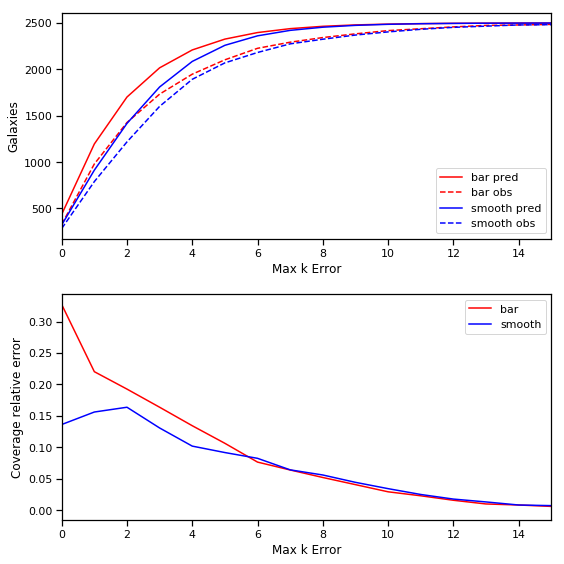

In [12]:
fig, (ax0, ax1) = plt.subplots(nrows=2, figsize=(8, 8))

ax0.plot(bars_df['max_state_error'], bars_df['prediction'], 'r', label='bar pred')
ax0.plot(bars_df['max_state_error'], bars_df['observed'], 'r--', label='bar obs')
# ax.plot(bars_single_df['max_state_error'], bars_single_df['prediction'], label='bar single_obs')

ax0.plot(smooth_df['max_state_error'], smooth_df['prediction'], 'b', label='smooth pred')
ax0.plot(smooth_df['max_state_error'], smooth_df['observed'], 'b--', label='smooth obs')

ax0.set_xlim([0, 15])
ax0.set_xlabel('Max k Error')
ax0.set_ylabel('Galaxies')
ax0.legend()


ax1.plot(bars_df['max_state_error'], bars_df['relative_error'], 'r', label='bar')

ax1.plot(smooth_df['max_state_error'], smooth_df['relative_error'], 'b', label='smooth')

ax1.set_xlim([0, 15])
ax1.set_xlabel('Max k Error')
ax1.set_ylabel('Coverage relative error')
ax1.legend()

fig.tight_layout()

In [13]:
# replicate for paper

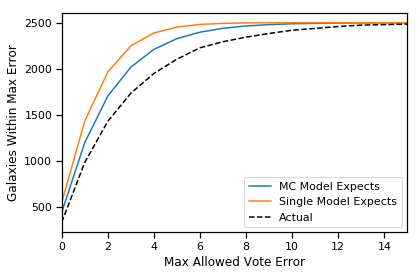

In [22]:
fig, ax = plt.subplots()

# ax.plot(bars_df['max_state_error'], bars_df['prediction'], 'r', label='bar pred')
# ax.plot(bars_df['max_state_error'], bars_df['observed'], 'r--', label='bar obs')
# ax.plot(bars_single_df['max_state_error'], bars_single_df['prediction'], label='bar single_obs')


plt.plot(bars_df['max_state_error'], bars_df['prediction'], label='MC Model Expects')
plt.plot(bars_single_df['max_state_error'], bars_single_df['prediction'], label='Single Model Expects')
plt.plot(bars_single_df['max_state_error'], bars_df['observed'], 'k--', label='Actual')

ax.set_xlabel('Max Allowed Vote Error')
ax.set_ylabel('Galaxies Within Max Error')
ax.legend()
ax.xaxis.set_major_formatter(StrMethodFormatter('{x:.0f}'))  # must expect 'x' kw arg

ax.set_xlim([0, 15])
fig.tight_layout()

model_name = 'bars-full'
save_dir = '../analysis/uncertainty/al-binomial/{}'.format(model_name)
fig.savefig(os.path.join(save_dir, 'coverage_comparison_200_samples.png'))
fig.savefig(os.path.join(save_dir, 'coverage_comparison_200_samples.pdf'))

In [21]:
!pwd

/home/mike/repos/zoobot/notebooks
